# Imports

In [1]:
# Torch
import torch

# Utils

from src.utils import GeneralLogger
from src.algos.config import get_exp_envs
from src.utils.cl_torchrl_helper import (
    plot_rewards_and_actions
)
from src.algos.ppo import (
    train_policy,
    create_probabilistic_policy,
    create_critic,
    sample_data,
    create_replay_buffer,
    create_loss_module,
)

# Create training and validation environments

In [2]:
data_path = 'data/naive_2_buildings_simple/'
reward = 'weighted_cost_emissions'
seed = 1
day_count = 1
personal_encoding = False
# device = 'cpu'
device = 'cuda'
gpu_device_ix = 5


train_env, eval_env, device = get_exp_envs(
    data_path=data_path,
    reward=reward,
    seed=seed,
    day_count=day_count,
    device=device,
    gpu_device_ix=gpu_device_ix,
    personal_encoding=personal_encoding
)


# PPO Training

In [ ]:
# Sampling
days_per_iter = 500
frames_per_batch = days_per_iter * 24  # Number of team frames collected per training iteration
n_iters = 25  # Number of sampling and training iterations
total_frames = frames_per_batch * n_iters

# Training
days_per_batch = 25  # Number of days per training iteration
num_epochs = 30  # Number of optimization steps per training iteration
minibatch_size = days_per_batch * 24  # Size of the mini-batches in each optimization step
max_grad_norm = 1.0  # Maximum norm for the gradients
lr = 1e-3  # Learning rate

# PPO
clip_epsilon = 0.2  # clip value for PPO loss
gamma = 1  # discount factor
lmbda = 1  # lambda for generalised advantage estimation
entropy_eps = 5e-3  # coefficient of the entropy term in the PPO loss

# Networks configurations

share_parameters_policy = True
share_parameters_critic = True
multi_agent_ppo = True
group_features = True

# Create networks
policy = create_probabilistic_policy(
    train_env, share_parameters_policy=share_parameters_policy, device=device, group_features=group_features
)
critic = create_critic(
    train_env, share_parameters_critic=share_parameters_critic, mappo=multi_agent_ppo, device=device, group_features=group_features
)

# Configure data collection
collector = sample_data(train_env, policy, device, frames_per_batch, n_iters)

# Create replay buffer
replay_buffer = create_replay_buffer(frames_per_batch, device, minibatch_size)

# Create loss module
loss_module = create_loss_module(policy, critic, train_env, clip_epsilon, entropy_eps, gamma, lmbda)

# Create optimizer
optim = torch.optim.Adam(loss_module.parameters(), lr)

# Confiure logger

logger = GeneralLogger()
logger.setup(
    config={
        "wdb_log": False,
        "csv_log": True,
        "console_log": False,
        "exp_config": {},
    }
)

# Train policy

policy, summary = train_policy(
    env=train_env,
    policy=policy,
    eval_env=eval_env,
    n_iters=n_iters,
    collector=collector,
    loss_module=loss_module,
    replay_buffer=replay_buffer,
    local_epochs=num_epochs,
    frames_per_batch=frames_per_batch,
    minibatch_size=minibatch_size,
    max_grad_norm=max_grad_norm,
    optim=optim,
    logger=logger,
)

episode: 1, reward_mean: -5.436874866485596, eval_reward_mean: -5.48005485534668:   4%|▍         | 1/25 [02:02<48:56, 122.35s/it]

### Plot results

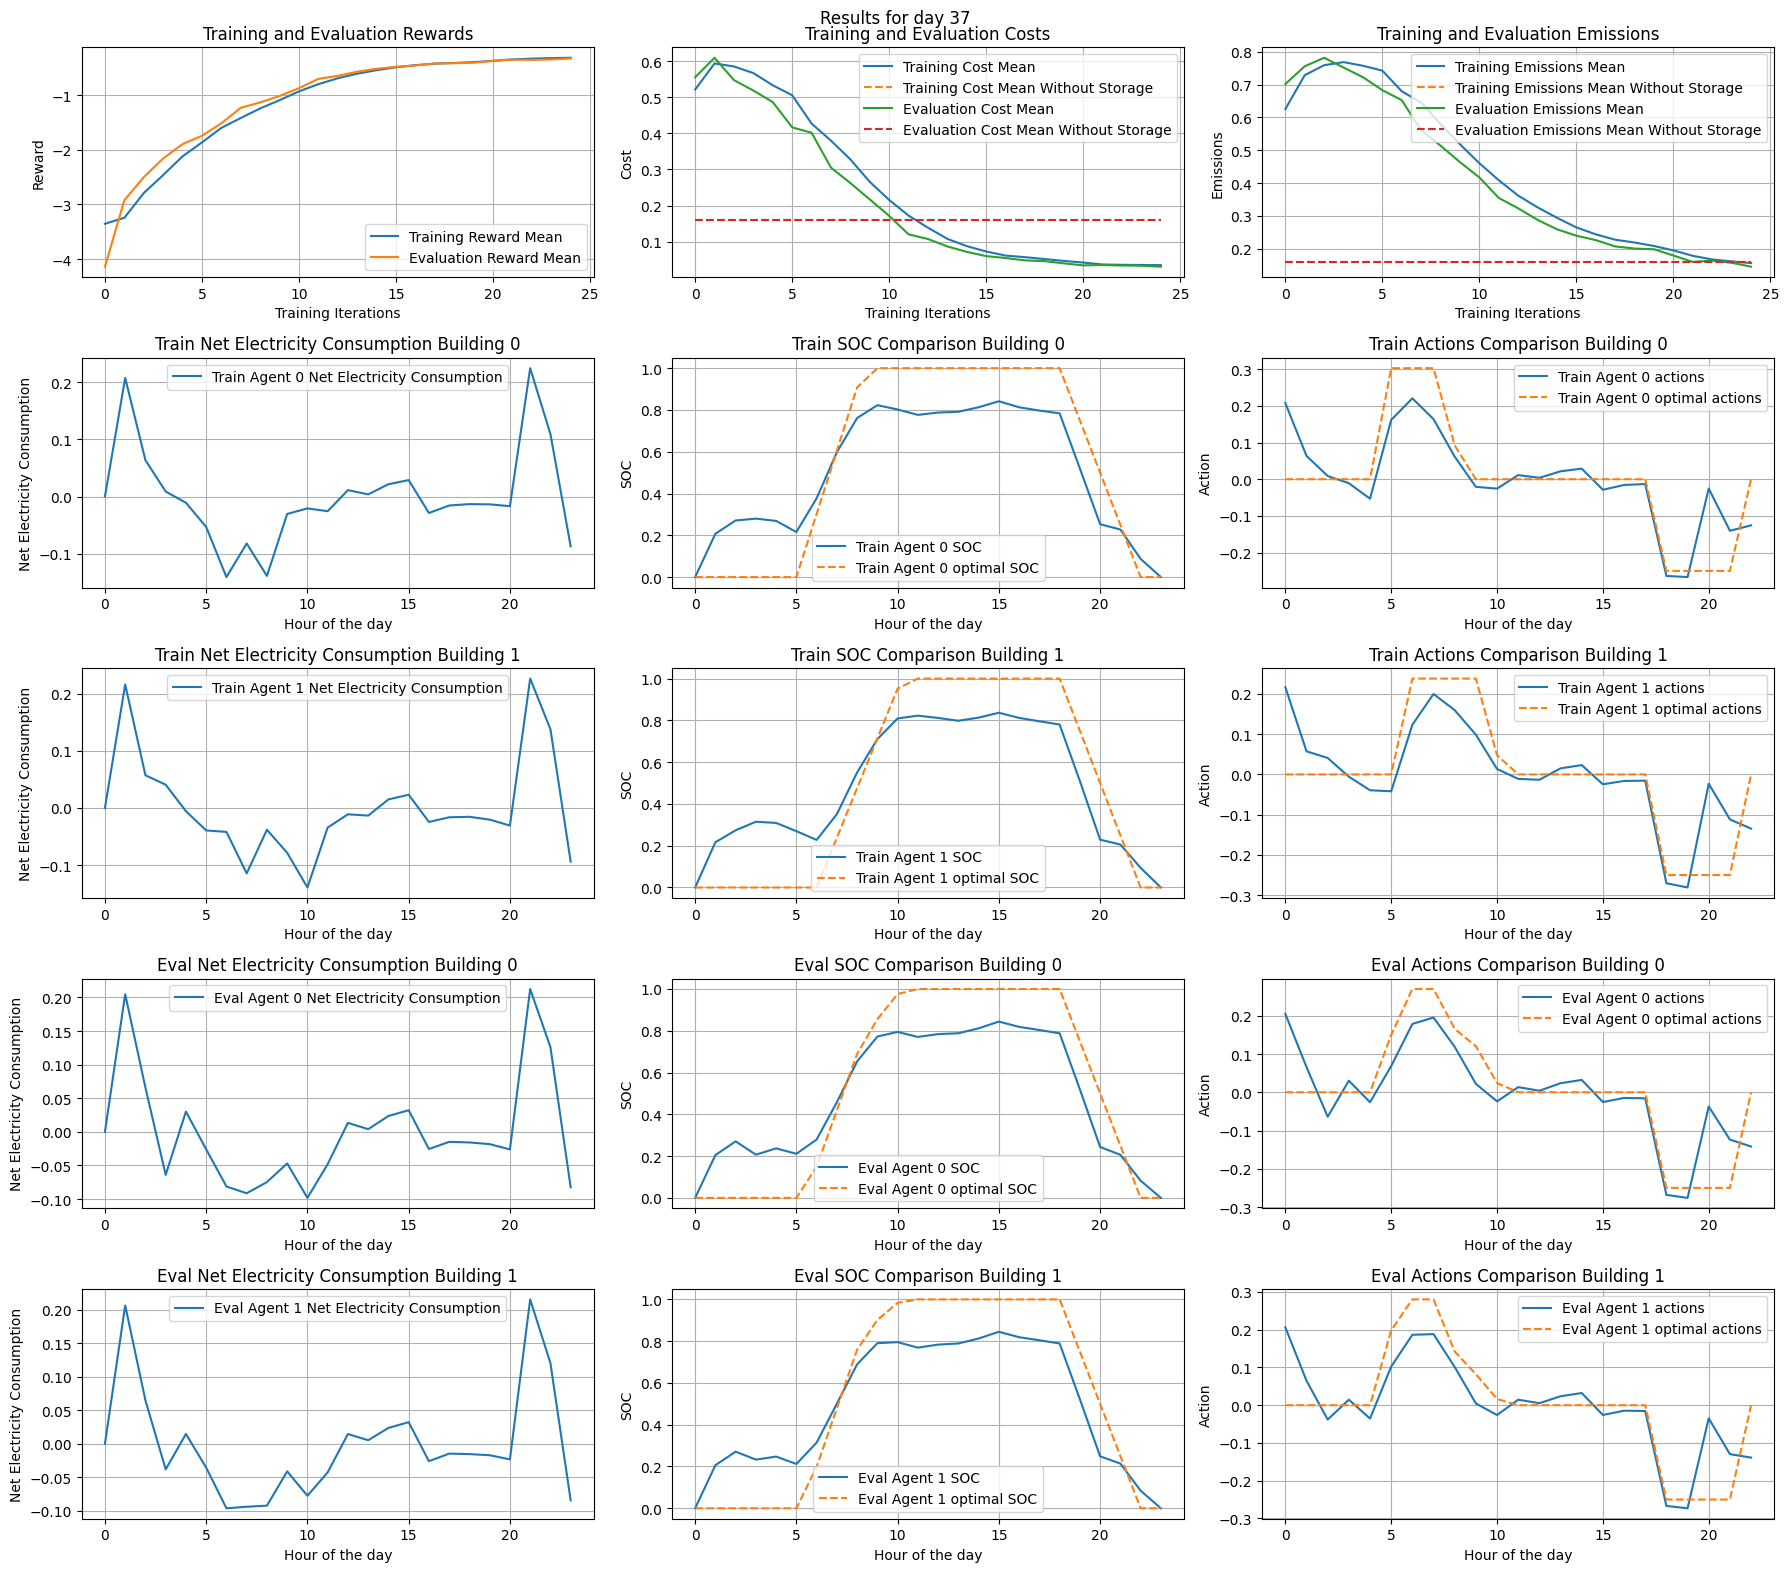

In [4]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    summary=summary,
)

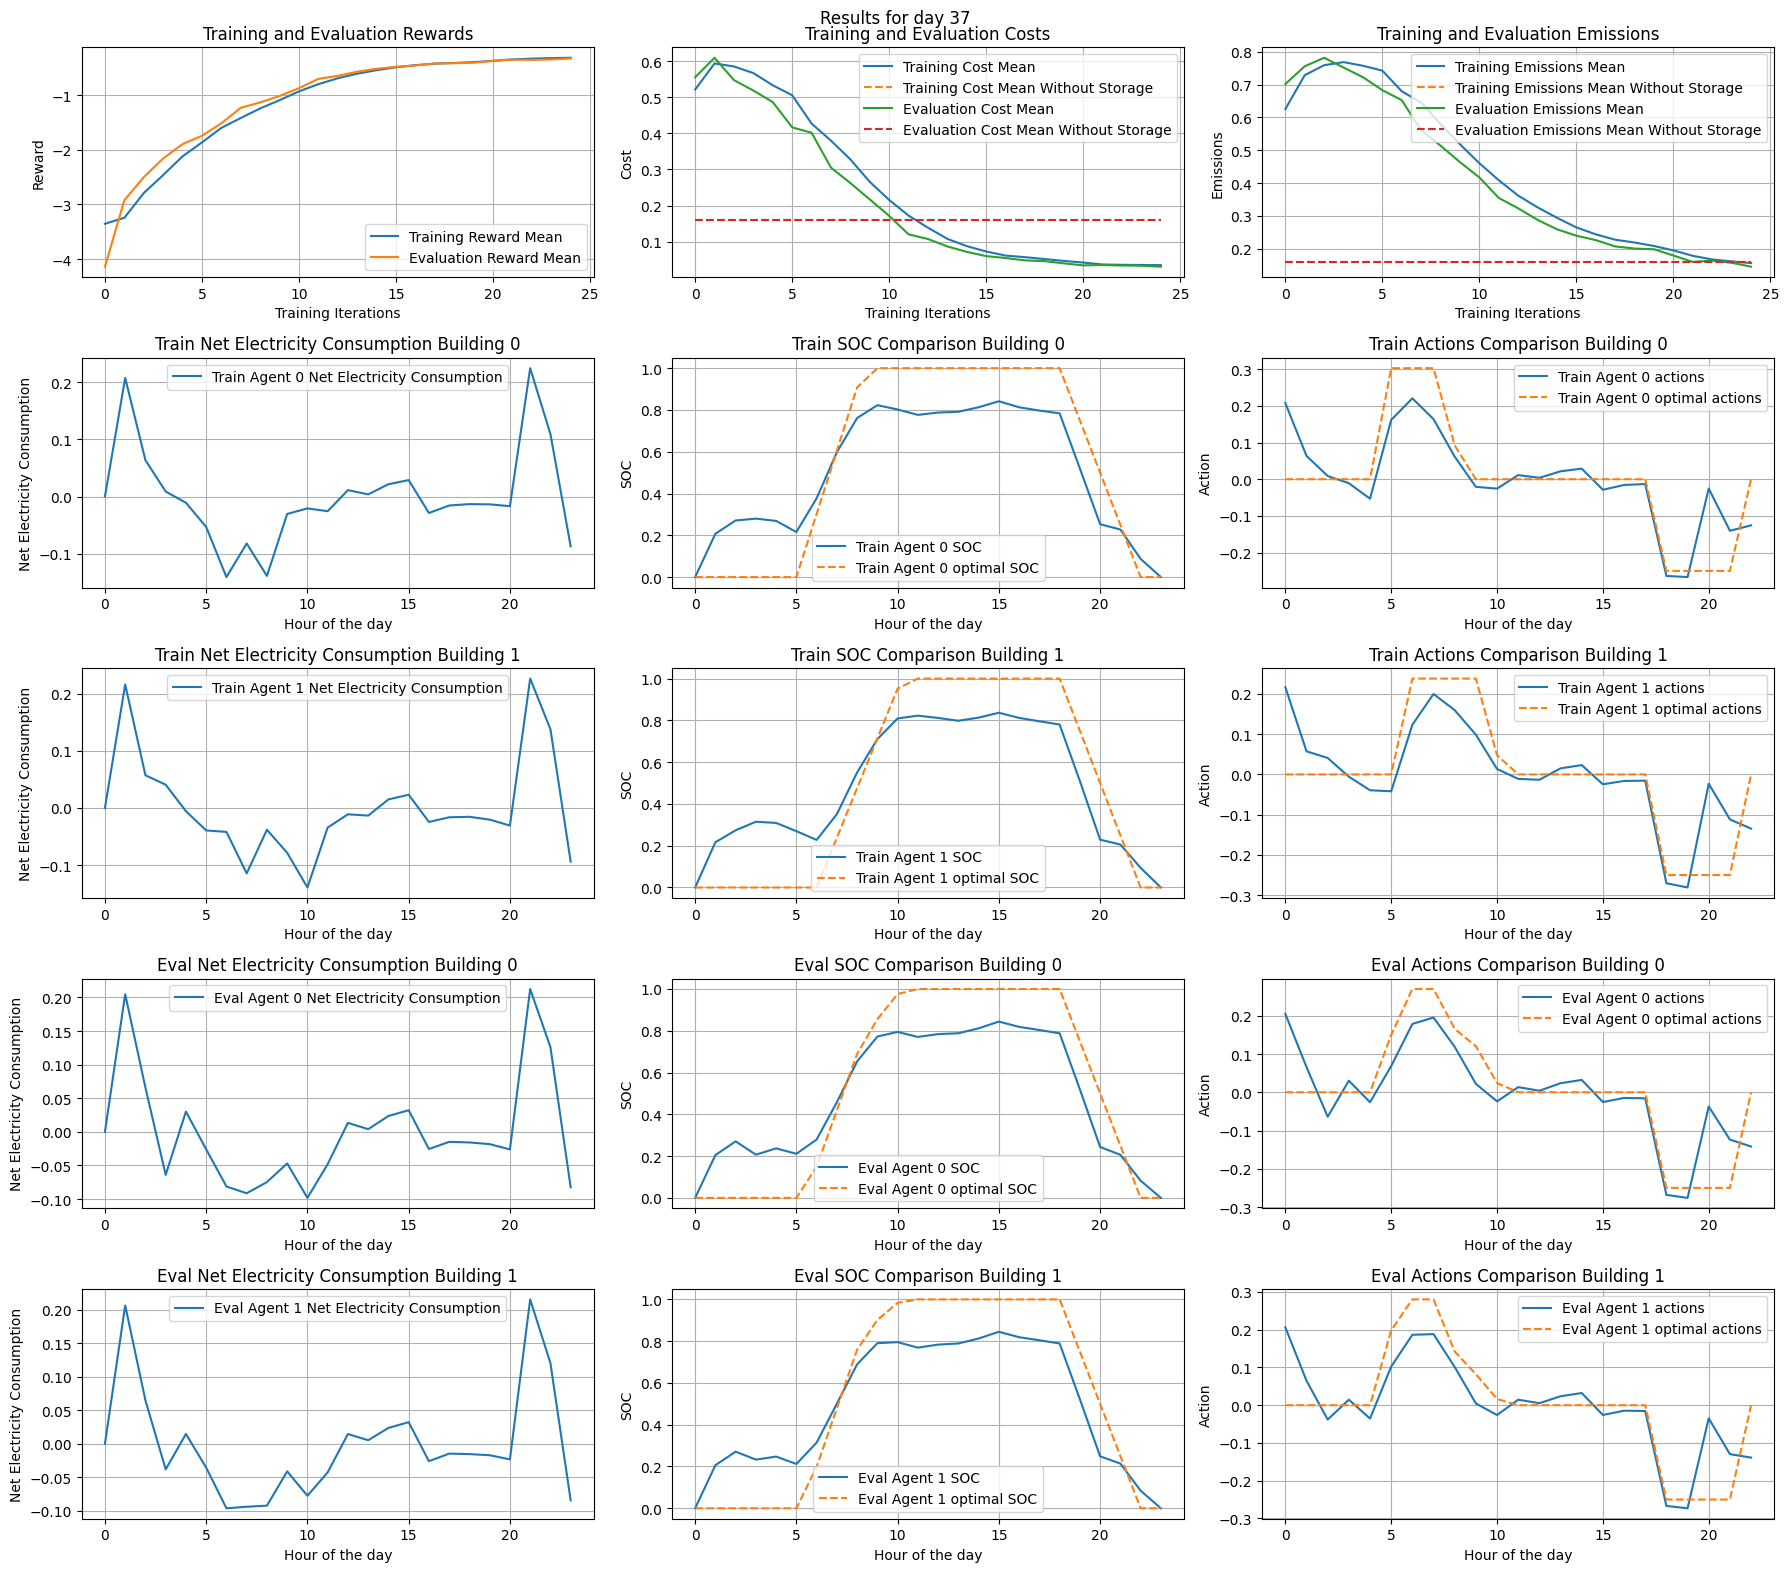

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    summary=summary,
)

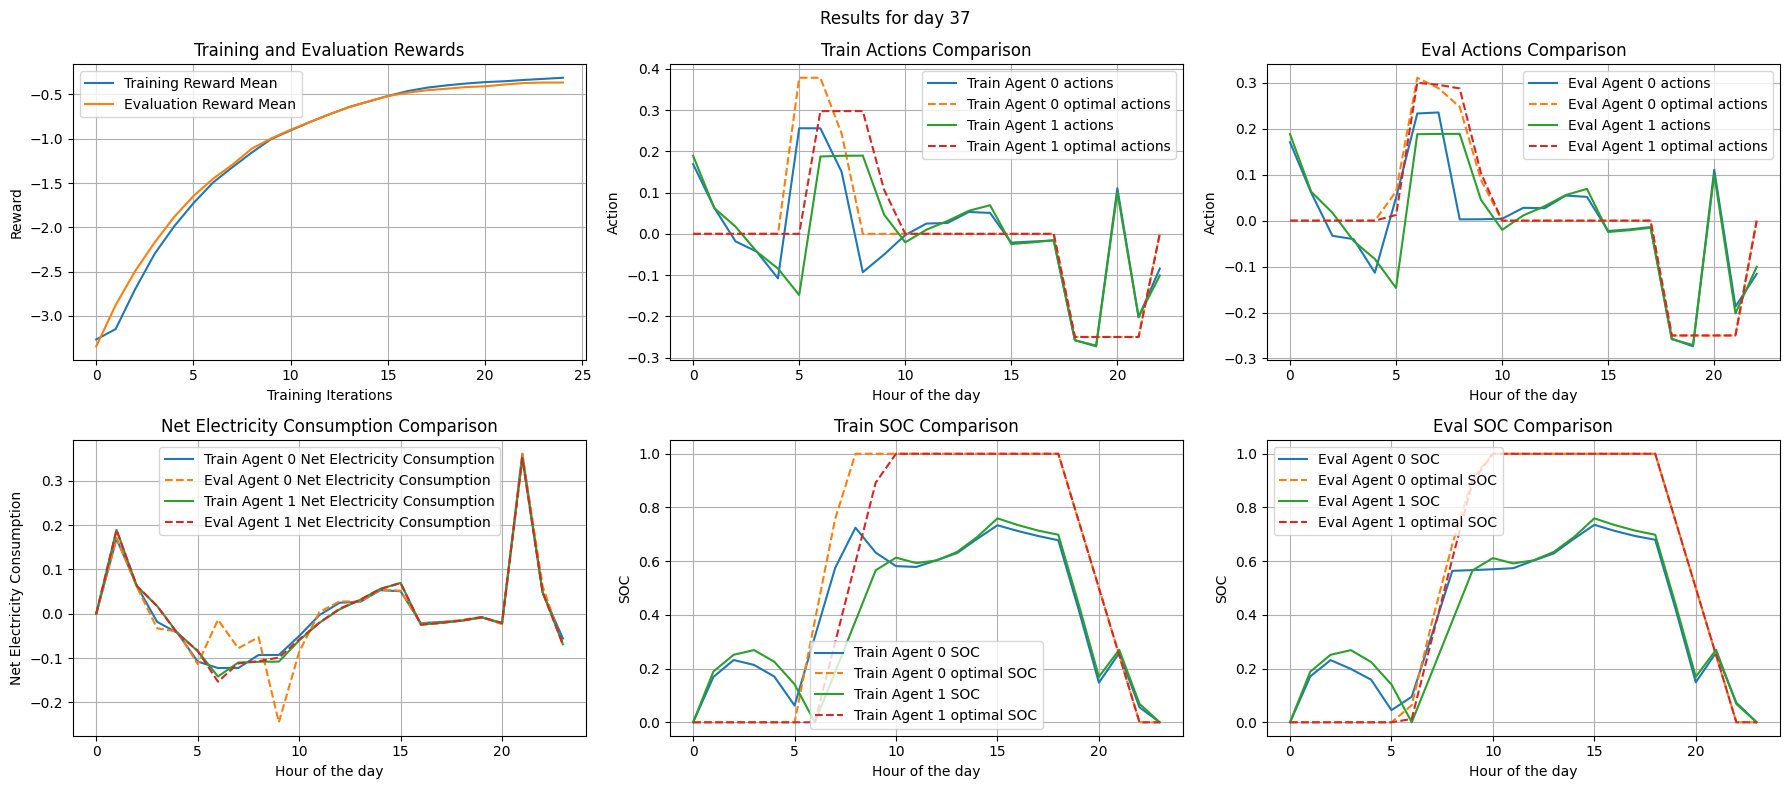

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    train_rewards=reward_mean_list,
    eval_rewards=eval_reward_mean_list,
)

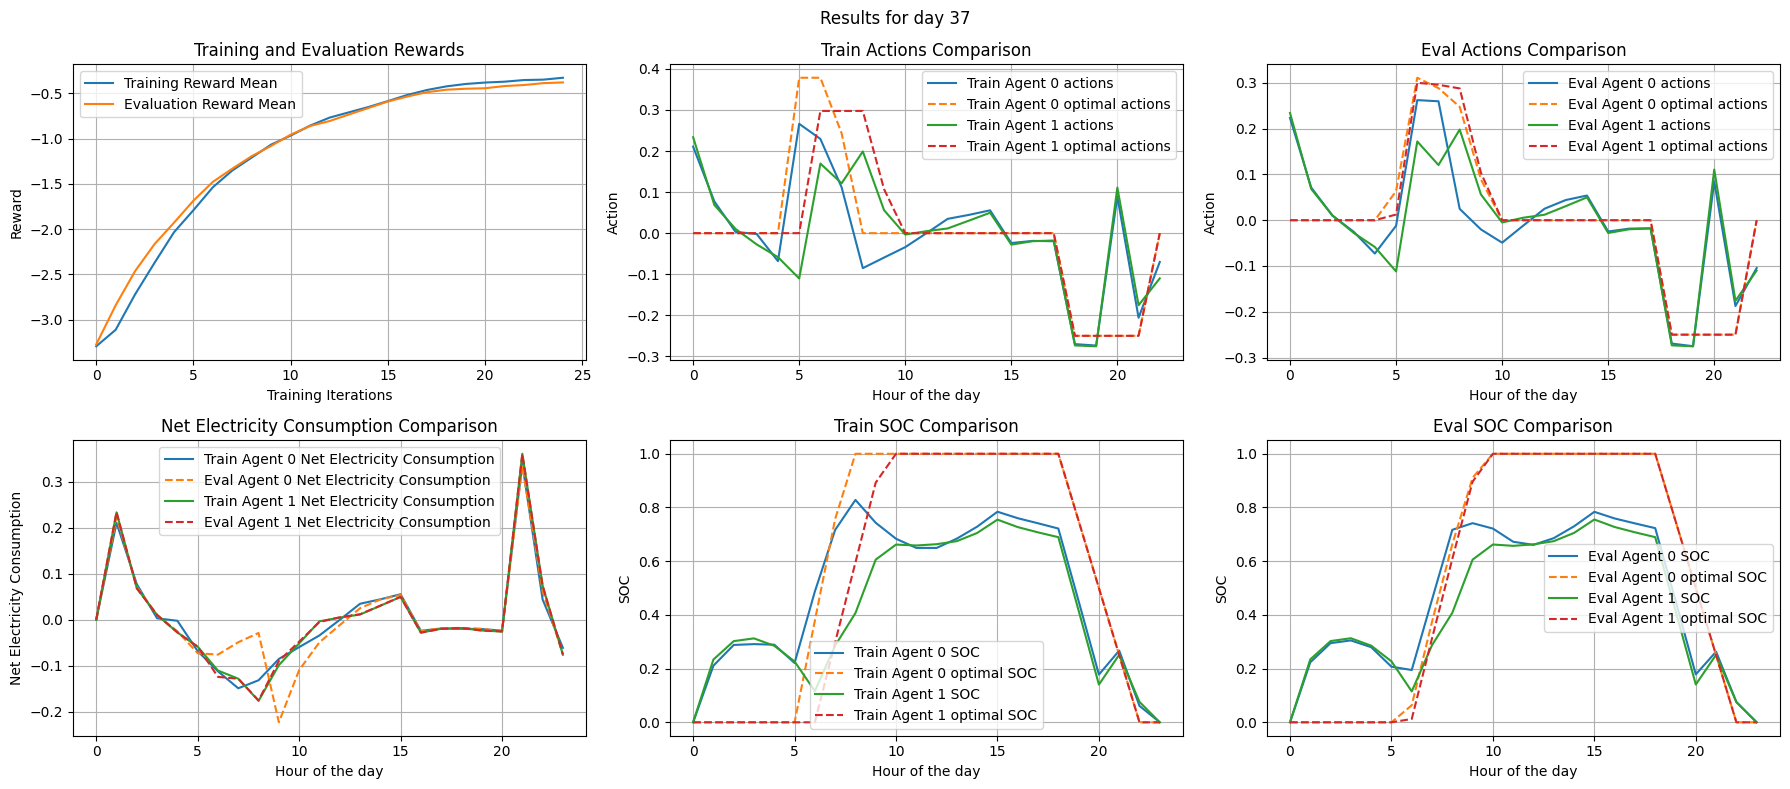

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    train_rewards=reward_mean_list,
    eval_rewards=eval_reward_mean_list,
)

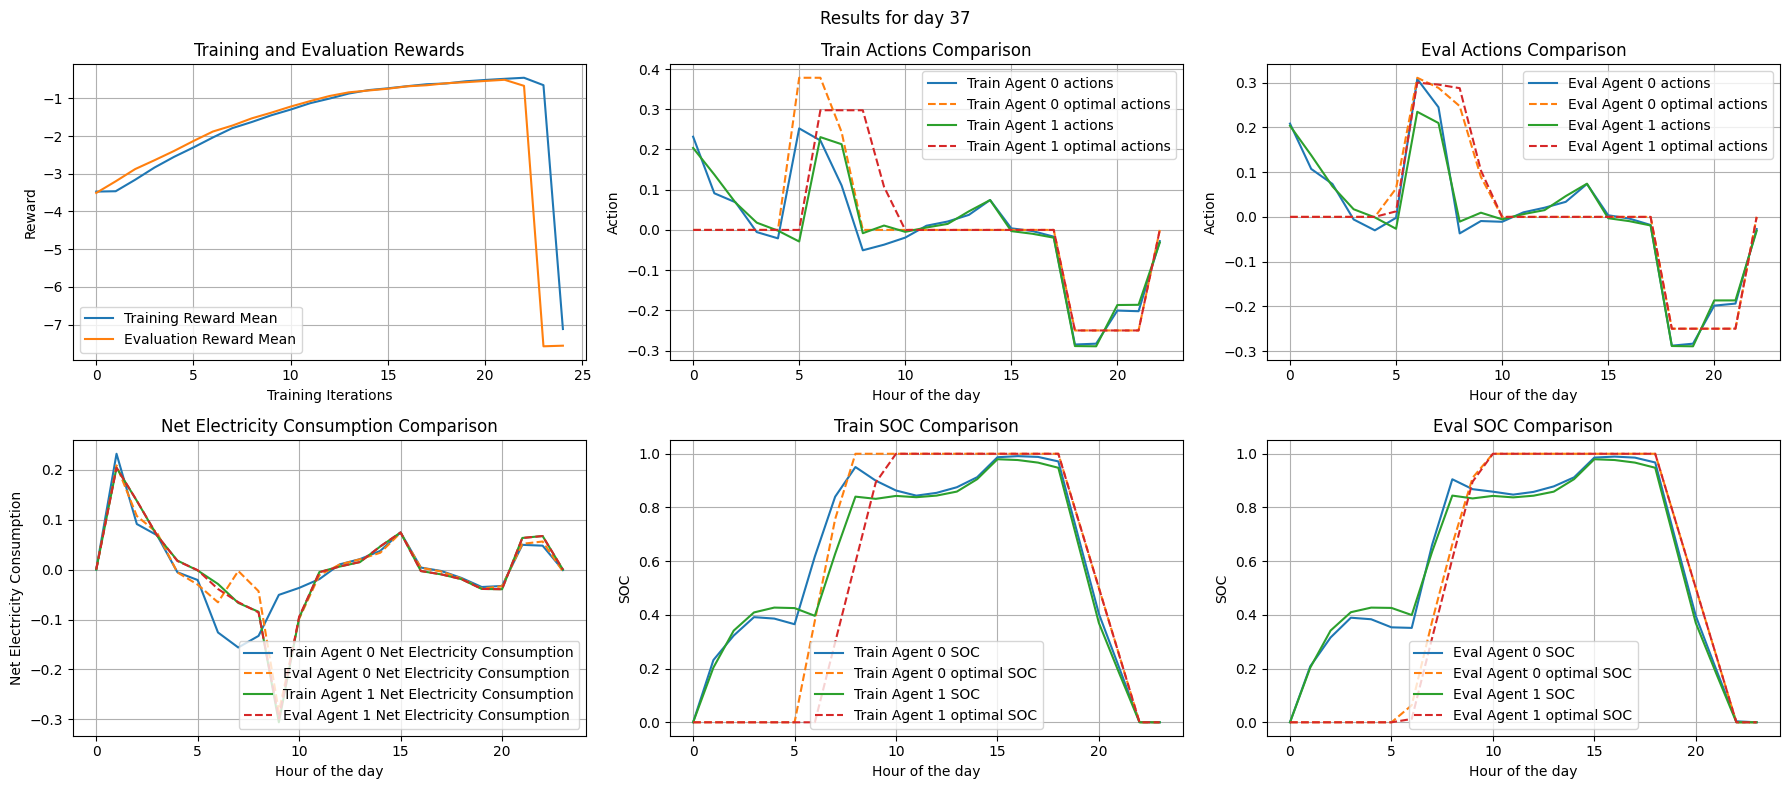

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    train_rewards=reward_mean_list,
    eval_rewards=eval_reward_mean_list,
)

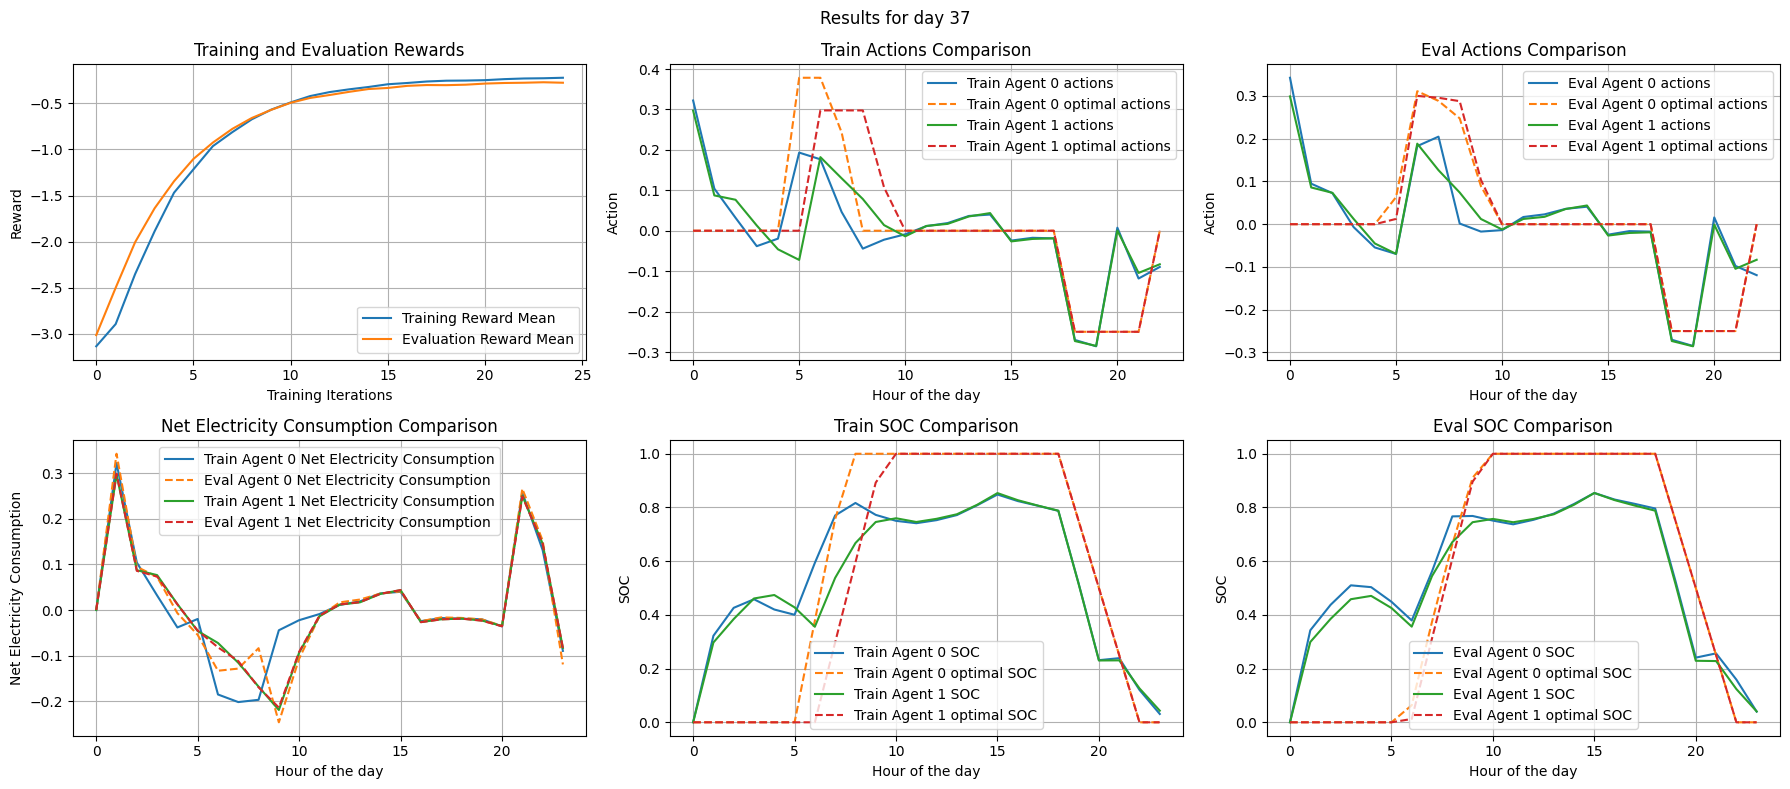

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    train_rewards=reward_mean_list,
    eval_rewards=eval_reward_mean_list,
)

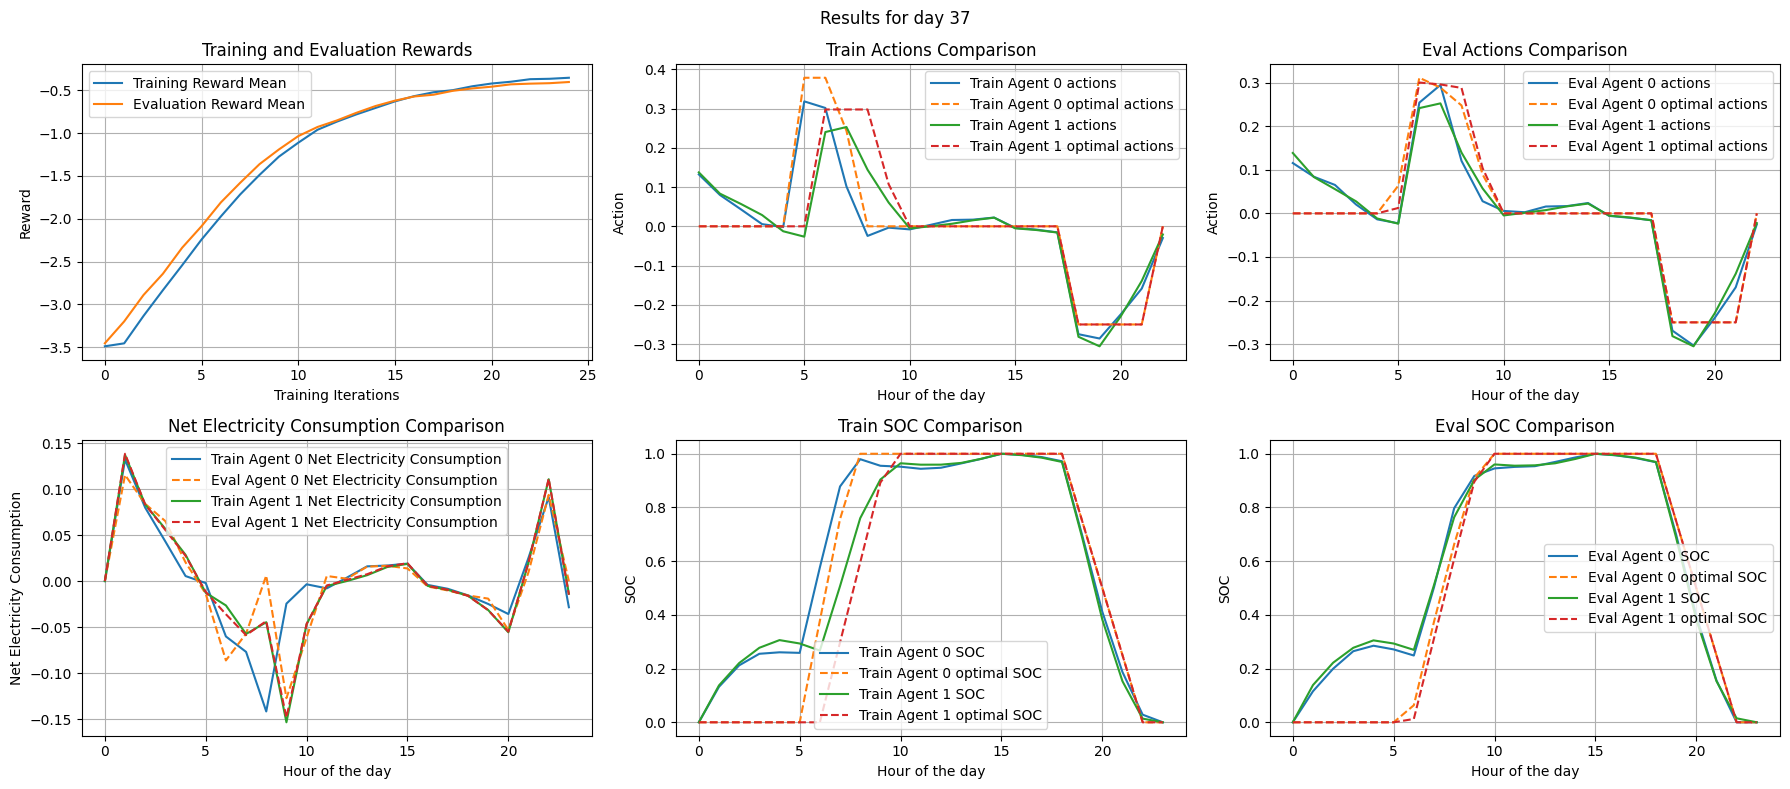

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    train_rewards=reward_mean_list,
    eval_rewards=eval_reward_mean_list,
)

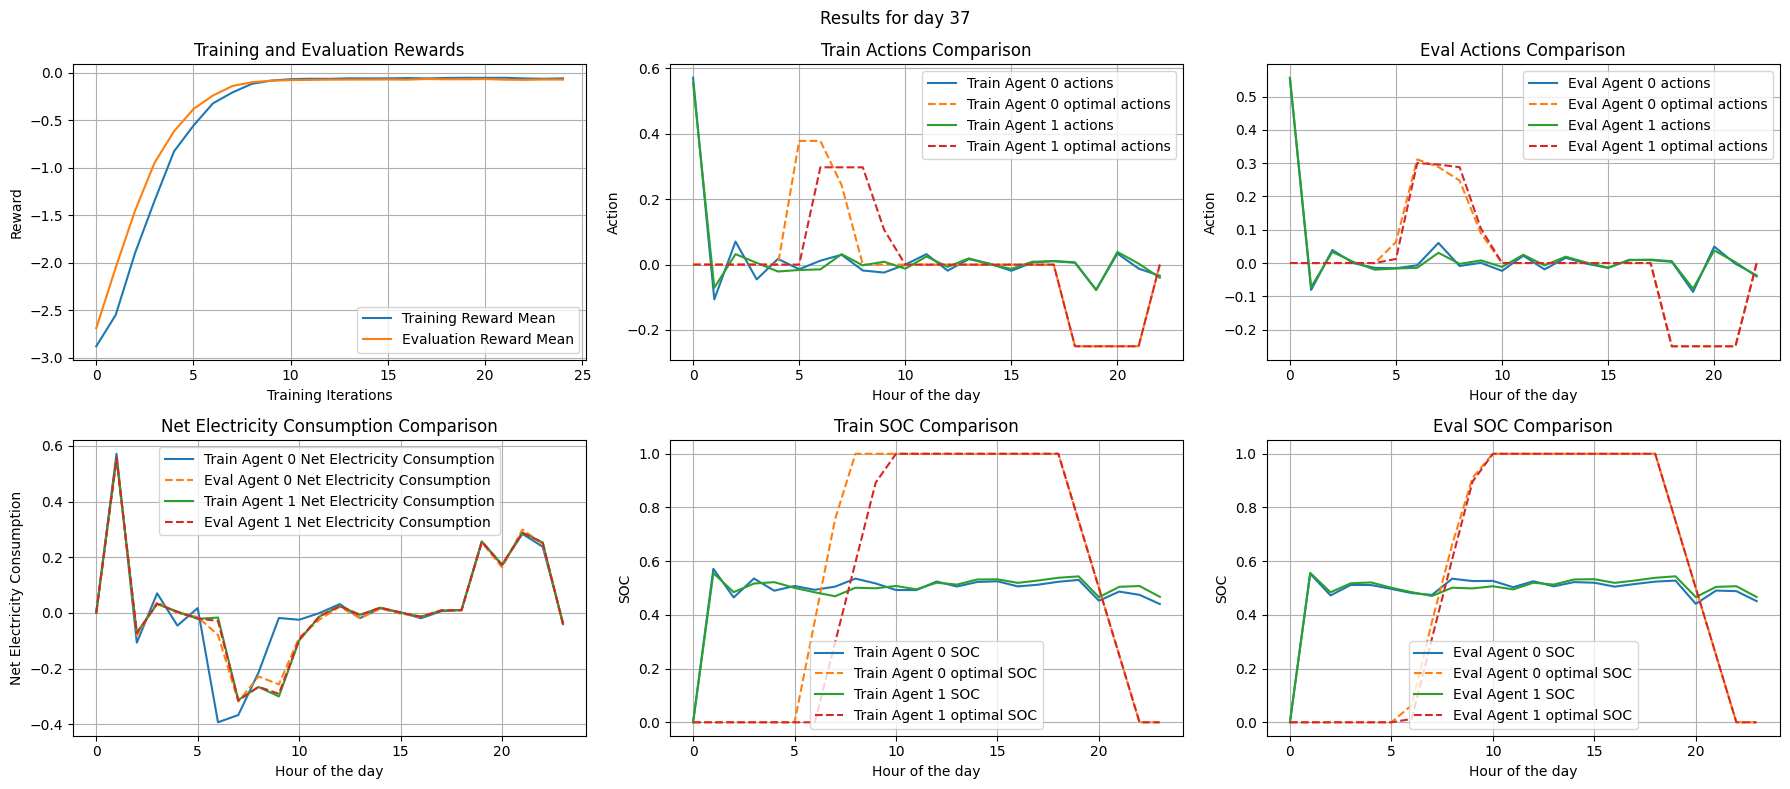

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    train_rewards=reward_mean_list,
    eval_rewards=eval_reward_mean_list,
)

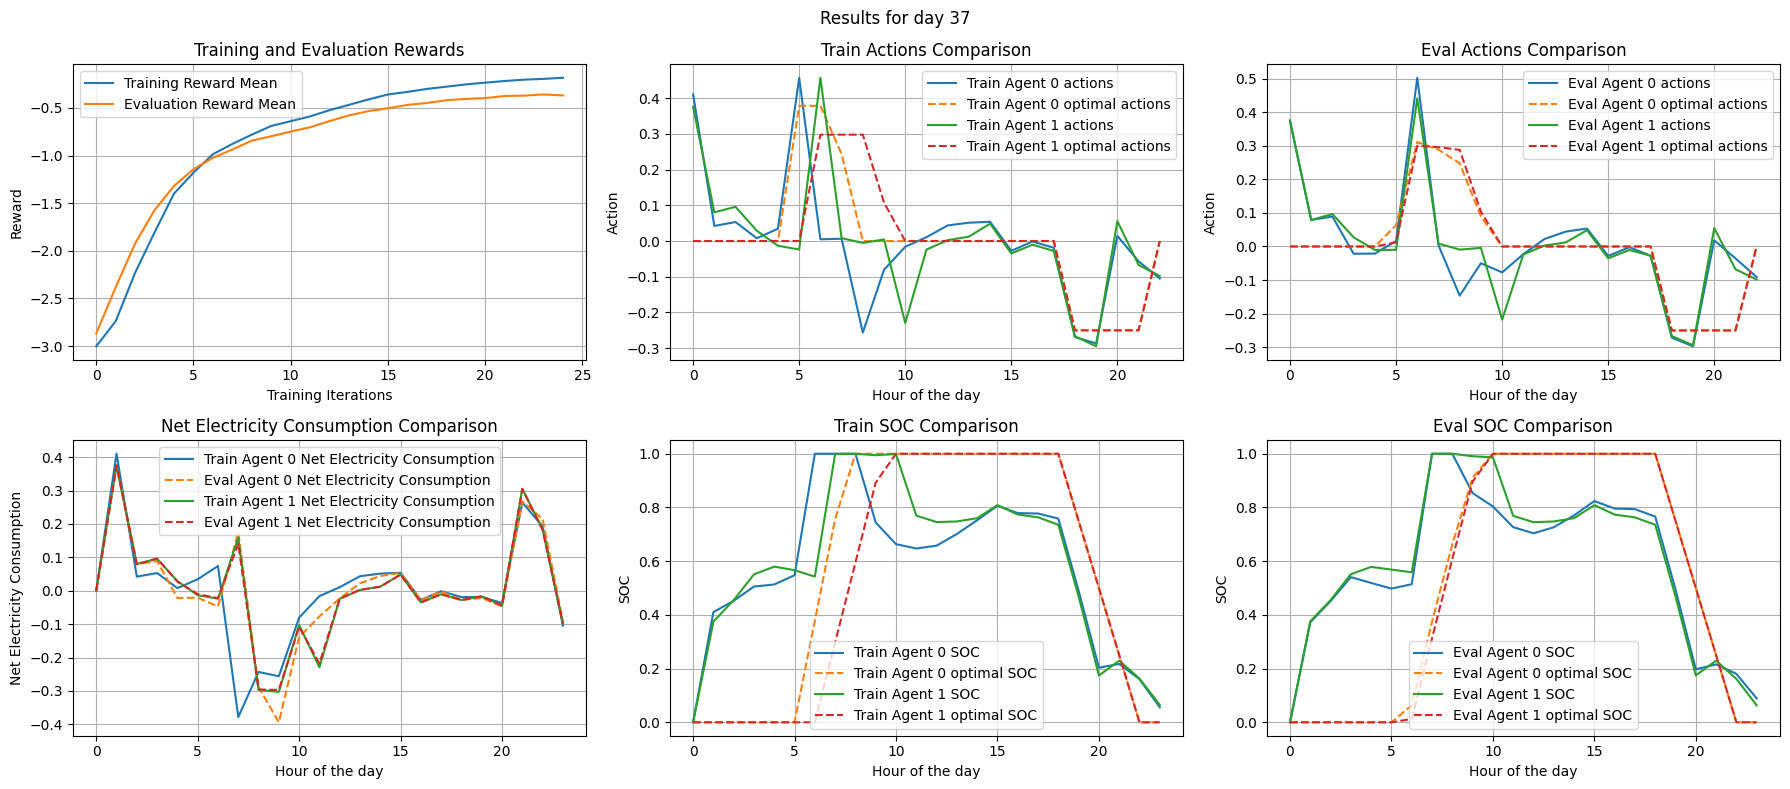

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    train_rewards=reward_mean_list,
    eval_rewards=eval_reward_mean_list,
)

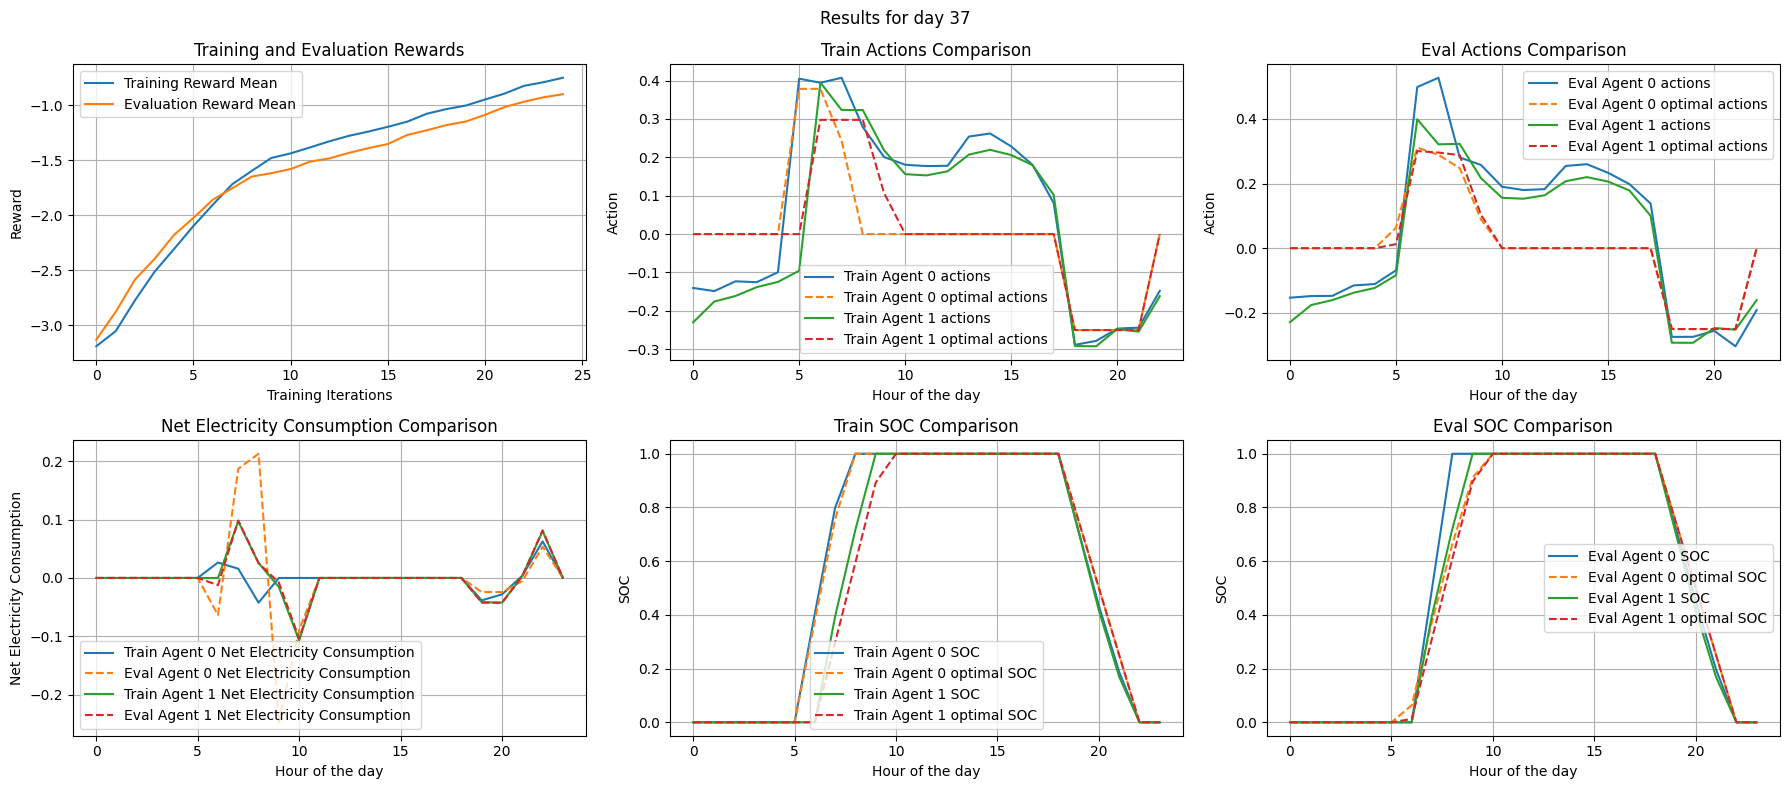

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    train_rewards=reward_mean_list,
    eval_rewards=eval_reward_mean_list,
)

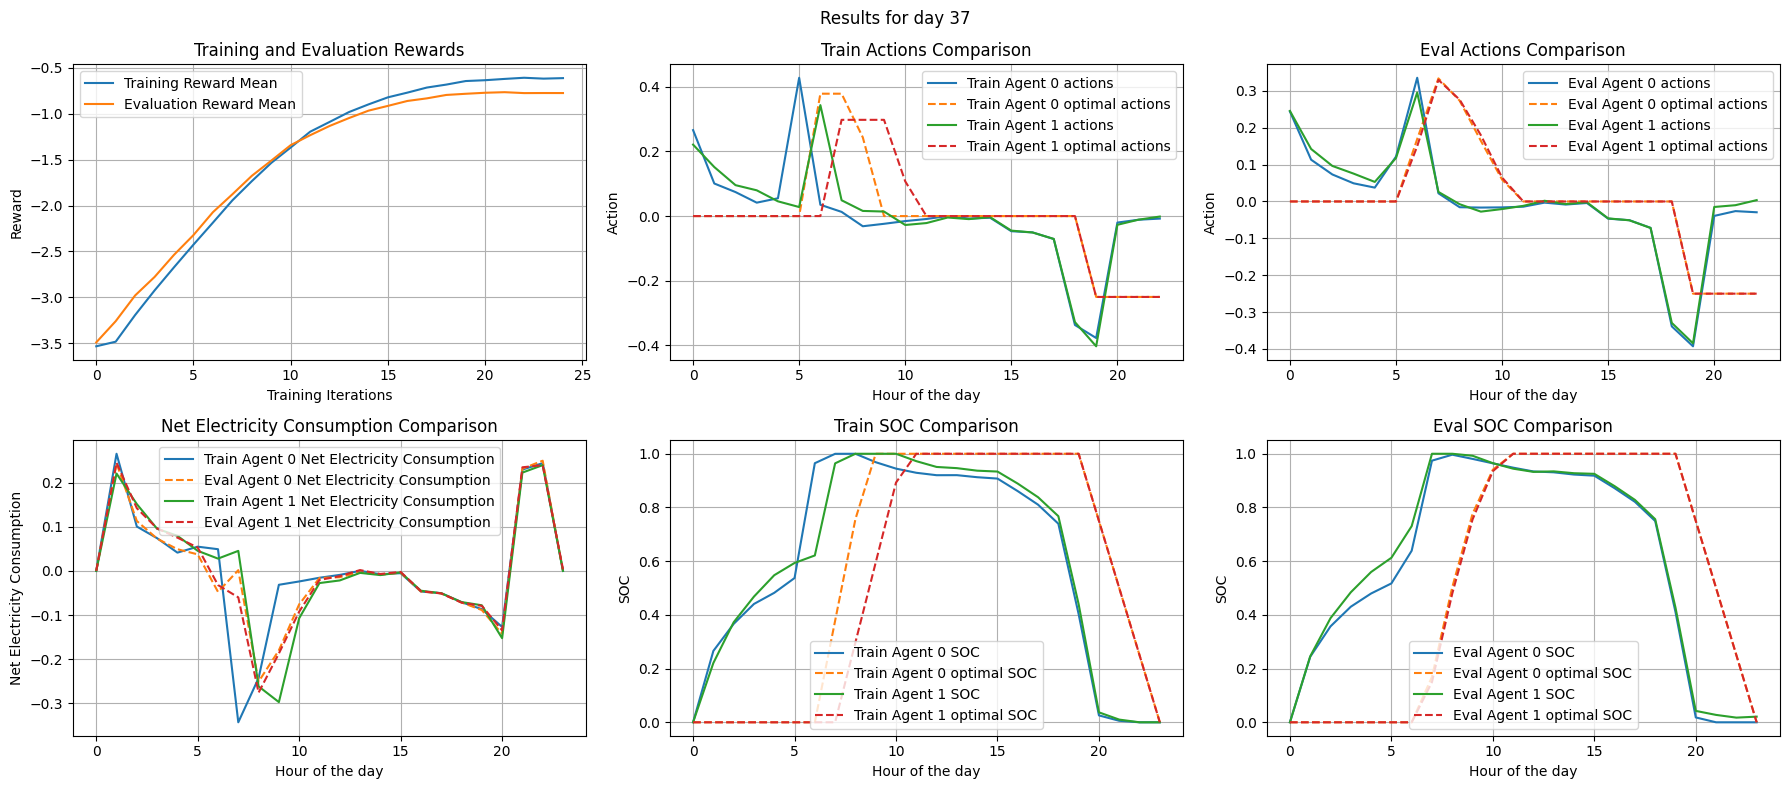

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    train_rewards=reward_mean_list,
    eval_rewards=eval_reward_mean_list,
)

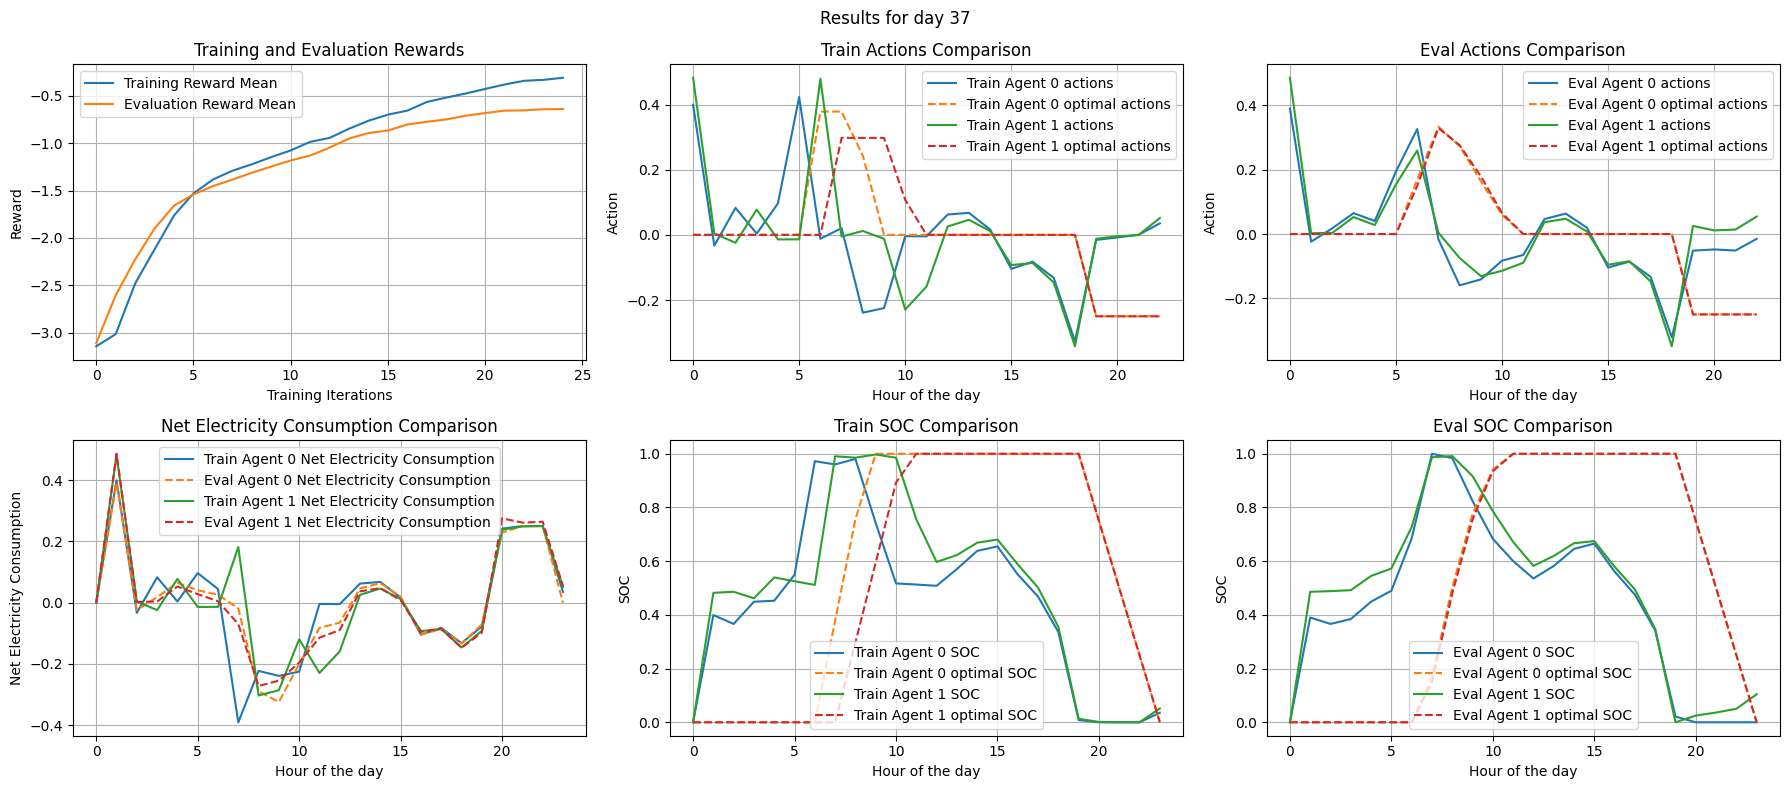

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    train_rewards=reward_mean_list,
    eval_rewards=eval_reward_mean_list,
)

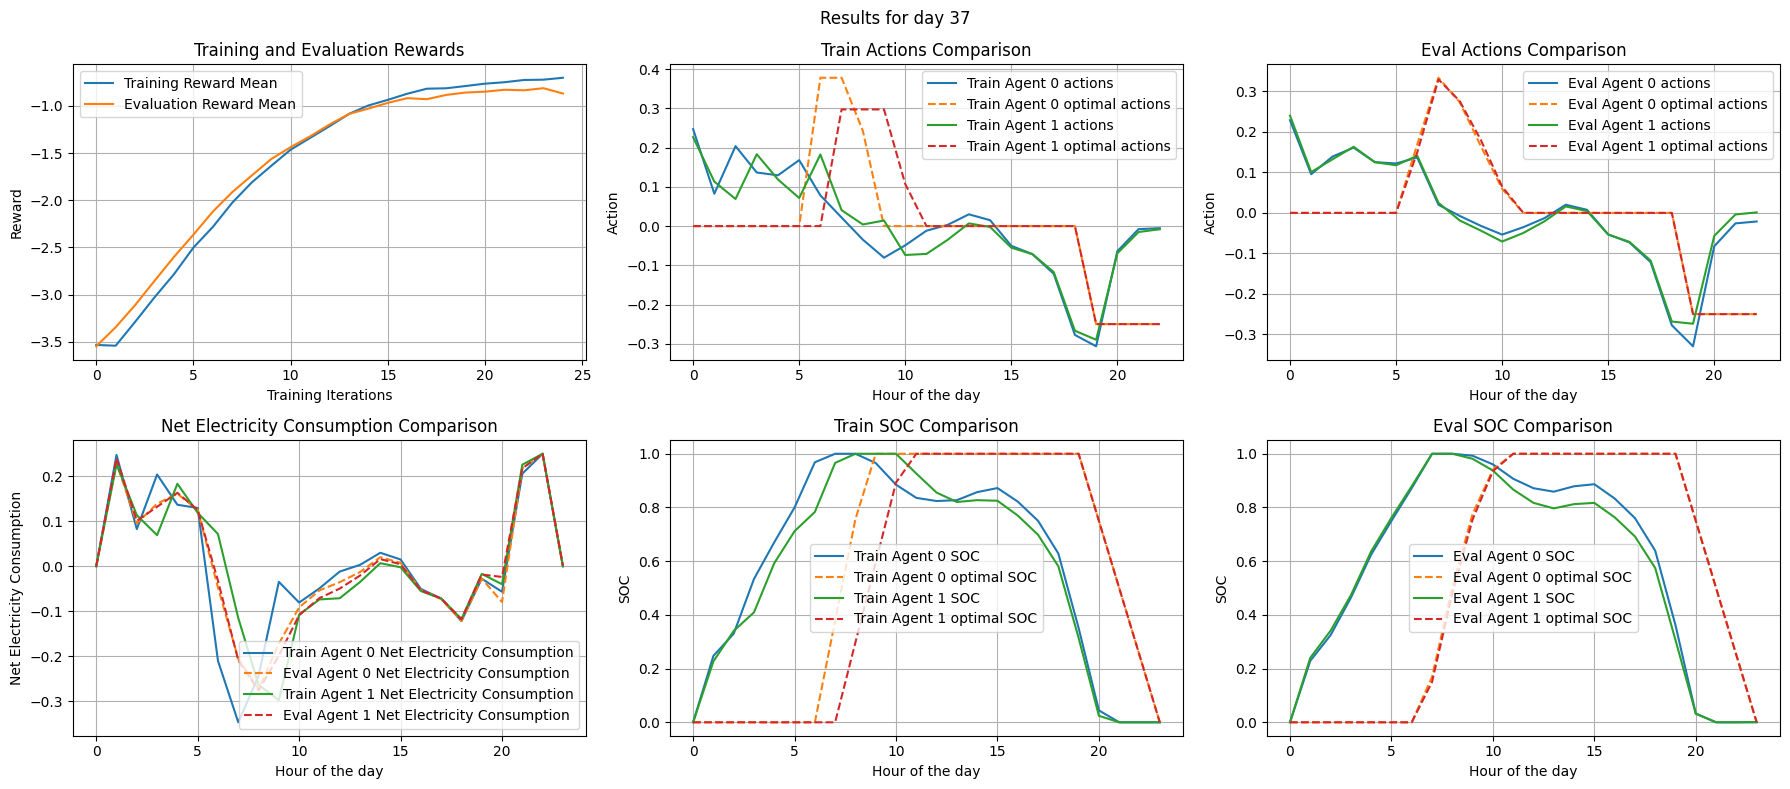

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    train_rewards=reward_mean_list,
    eval_rewards=eval_reward_mean_list,
)

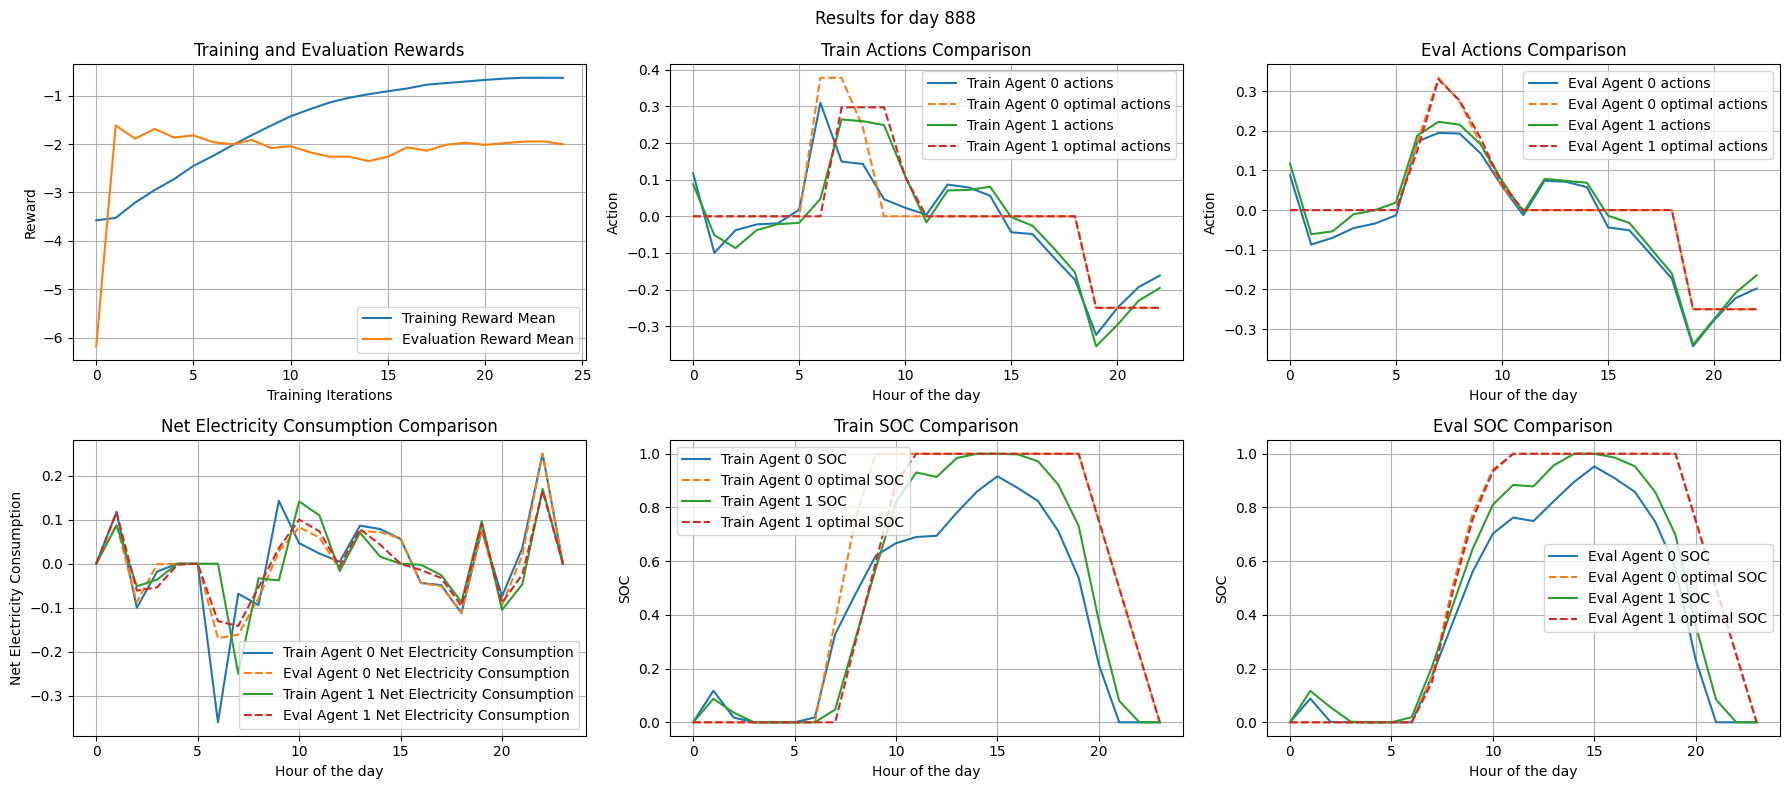

In [17]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    train_rewards=reward_mean_list,
    eval_rewards=eval_reward_mean_list,
)